In [6]:
# import packages
import pandas as pd #this for importing/exporting data and creating dataframes
import numpy as np #this is for scientific computation. 
import copy #this allows to copy
import scipy.stats.stats as stats #this is probability distributions and a library of statistical functions
from sklearn.model_selection import train_test_split #this is to split the data into train and test (validation)
from sklearn.linear_model import LogisticRegression #this is logistic regression
from sklearn.metrics import roc_auc_score #to calculate the ROC
import matplotlib.pyplot as plt #this is for the graph
from sklearn.tree import DecisionTreeClassifier #this is for decision tree
from sklearn import tree #this is for decision tree too
pd.options.mode.chained_assignment = None  # default='warn' #this is for hide warm

In [19]:
# import data
db = pd.read_csv(r"\\neptune\RAD\4 Models\Scorecard 8.0\Modeling Data\Missing\CA\Accepts_2600.csv") #imports the accepted file

C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (423) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
# frequency
Count_Bad = db.groupby("TARGET_GB").count().loc['BAD','LNKEY']
Count_Good_INDET = db.groupby("TARGET_GB").count().loc[['GOOD','INDET'],'LNKEY'].sum()
if Count_Good_INDET > Count_Bad:
    freq_dic = {'GOOD':Count_Good_INDET/Count_Bad,'BAD':1}
else:
    freq_dic = {'GOOD':1,'BAD':Count_Bad/Count_Good_INDET}
freq_dic

{'GOOD': 2.229813664596273, 'BAD': 1}

In [21]:
def Add_Frequency(row,freq_dic):
    if row["TARGET_GB"] == 'BAD':
        return freq_dic['BAD']
    else:
        return freq_dic['GOOD']

db['Frequency'] = db.apply(lambda row : Add_Frequency(row,freq_dic), axis=1)
db[['TARGET_GB','Frequency']].head(5)

,TARGET_GB,Frequency
0,BAD,1.000000
1,GOOD,2.229814
2,GOOD,2.229814
3,BAD,1.000000
4,GOOD,2.229814


In [22]:
# filter Good and Bad
Goods=db[db["TARGET_GB"]=="GOOD"]  #we use two db because one db will give the count of the whole dataset
Bads=db[db["TARGET_GB"]=="BAD"]
print("Good:",len(Goods), "Bad:",len(Bads))

Good: 1543 Bad: 805


In [20]:
#sample down
if len(Goods) >= len(Bads):
    Bad = Bads
    Good = Goods.sample(len(Bad),random_state =2602)
    print("Good:",len(Good),"Bad:",len(Bad))
else:
    Good = Goods
    Bad = Bads.sample(len(Good),random_state=2602)
    print("Good:",len(Good),"Bad:",len(Bad))

Good: 3350 Bad: 3350


In [21]:
# append Good and Bad
GB=Good.append(Bad) #can do Good.append(Bad)
print("append Good and Bad:",len(GB)) #GB #will give the dataset that has the good and bad appended

append Good and Bad: 6700


In [22]:
#not included in code
data_type = GB.dtypes #gives the datatype for each variable
#data_type #prints the list of the variable with the datatype

In [23]:
# all categorical variable and unnecessary columns
a = GB.dtypes[GB.dtypes=='object'].index.tolist()
b = GB.dtypes[GB.dtypes=='datetime64[ns]'].index.tolist()
a.extend(b)
a.extend(['OPENINGBALANCE_PCT','Contract_Open_Date','SCOREX','BY2_SCORE','NET_AFPCT','BYRAGE','ANNUAL_RATE','NAMTF_LFC'\
          ,'LOT_ID','CHECK_DATE','X_BOOK','RECOURSE','DISC_PC' ,'BY1_SCORE','PTI','CASH_DOWNPCT'\
          ,'INVOICE_BOOK_VALUE','NADA_VALUE','VHCL_YEAR','ODO','GROSS_MONTH','DOWN','PAYMENT','Buyer_1_MOSATWORK'\
          ,'Buyer_2_MOSATWORK','CTRL_ZIP','Advance','BYR1_FICO','AMTF_LFC','DECRULESET','CAR_AGE','AMTF_LFC_PCT_Risk'\
          ,'AUTOMOBILE_PRICE','ACV_VALUE','Valid_SSN_Indicator','CLOSE_DATE','CLOSE_DATE','GAIN','DR_ORIGBAL'\
          ,'DAYS_LATE','PAIDMO','TERM','FIRST_PMT_PAYMENT','LTVPCT_XBOOK','APR_ANNUAL_RATE','AMOUNT_FINANCED'\
          ,'BAD_CLOSECODE_Indicator','OPEN_YEARMONTH','CLOSE_YEARMONTH','LNKey','Frequency','SQL_LTV'\
         ,'SC60_Stage1','SC60_Stage2','SQL_CASHDOWNPCT','SQL_OPENINGBALANCE_PCT','SQL_PTI','Client Data','VANTAGE_V4_SCORE'\
         ,'IQF9416','IQF9417', 'IQF9410', 'IQF9415','IQF9510','IQA9510','IQF9540','TRADE_DATE'\
         ,'RSS2005_0_2','RVS2005_0_4','pd4_ad','telecommunications_score','bankcard_score','auto_score','short_term_lending_score'\
         ,'LL_BAL_TO_CREDIT','Days_Since_SF_LAST_APPL_RCVD','LL_SATISFACTORY','SL_DIFF_HOMEPHONE_EVER','ins5_online_ft_fis','RECORD_NB'])#extends the above "a" list to include other columns that we do not need 
a #a #will print the list "a" that includes all the columns that are categorical and that are not needed for the model

['LNKEY',
 'BY1_SEG',
 'BY1_GRADE',
 'BRANCH',
 'STA',
 'DEL_STA',
 'P',
 'MAKE',
 'MODEL',
 'INCOME_TYPE',
 'EMPLOYER_NAME',
 'JOB_POSITION',
 'LGL_ST',
 'CLOSE_CODE',
 'Decision_Status',
 'PMTs_Default',
 'Model_State',
 'LNKey',
 'SC60_Segment',
 'Client Data',
 'Client Data.1',
 'Client Data.2',
 'ARCHIVE_LABEL',
 'CCA_INQ_SEEN_EXCLUDING_484D',
 'CCA_INQ_SEEN_INCLUDING_48',
 'CCA_WORST_PMT_RATING',
 'CCA_HIT',
 'lnkey',
 'LL_BAD_ABA',
 'LL_BNKACT_MISMATCH',
 'LL_BANKRUPTCY',
 'LL_DL_MISMATCH',
 'LL_last_dt_APPL_RCVD',
 'LL_OL_last_dt_APPL_RCVD',
 'LL_SF_last_dt_APPL_RCVD',
 'LL_PAY_FREQ_MISMATCH',
 'LL_RESIDENCE_STATE_MISMATCH',
 'LL_SSN_MISMATCH',
 'ACH_BI1_BankAccountID',
 'ACH_BI1_BUC1_Description',
 'ACH_BI1_BUC2_Description',
 'ACH_BI1_BUC3_Description',
 'ACH_BI1_BUC4_Description',
 'ACH_BI1_BUC5_Description',
 'ACH_BI1_BUC6_Description',
 'ACH_BI1_BUC7_Description',
 'ACH_SATISFACTORY_AMT_EVER',
 'LL_BAL_TO_CREDIT',
 'TARGET_GB',
 'OPENINGBALANCE_PCT',
 'Contract_Open_Date',

In [24]:
# drop unnecessary columns
GB_for_group = GB.drop(a,axis=1) #drops the list from GB which is defined in the append of good and bad. axis =1 is the columns
#GB_for_group #should give the new number of columns after dropping the variables in the list "a"

In [25]:
#create the frequency table by grabbing the frequency column from the table GB. This should be the same number as the append
frequency = GB['Frequency']
#frequency #will give the freq for each row in the GB table

In [26]:
#data partition
y = pd.get_dummies(GB["TARGET_GB"]) #converts categorical variable (target) into dummy/indicator variables such as zero and one. The G_B becomes two columns (Good and Bad)
y_Good = y["GOOD"] #target. Good is 1 and bad is 0
X_train, X_test, y_train, y_test = train_test_split(GB_for_group, y_Good, random_state = 12345, test_size=0.2) #2609
#X_train, X_test, y_train, y_test = train_test_split(all columns except target G_B, target column, random_state (random seed), test_size (or can use train_size))
#X_train #(training data)
#y_train #(training data target variable only)
#X_test #(test data)
#y_test #(test data target variable only)

In [27]:
# create quartile_cut function
def quartile_cut(temp_not_missing, frequency, m):
    t_name = temp_not_missing.name #column name
    a = temp_not_missing.copy() #copy the dataframe. Note this "a" is not the same "a" from above
    a = pd.concat([a,frequency],join='inner',axis=1) #combine the column with the frequency column
    a = a.sort_values(by = t_name) #sorts the column name from smallest to largest
    a['cumulative sum'] = a[frequency.name].cumsum() #calculates the cumulative sum of the frequency
    interval = (a['cumulative sum'].max()+0.05)/m #find the max of the cumulative sum and adds 0.5 to it and then divides it by m which is the number of buckets
    b = {'Bucket_#':[],'Bucket_max':[]} #emtpy lists
    for i in range(1,m+1): #the list will only start at 1 and end at m. It will not include m+1
        b['Bucket_#'].append(i) #b will keep getting appended with just the values of i. 
        b['Bucket_max'].append(a.loc[a['cumulative sum'] <= i*interval, t_name].max()) #this will check the max for each interval. Example, interval 1 for FICO can only go up to FICO score 418
    c = pd.DataFrame(b) #creates the data fram with bucket number and the bucket max for each bucket number
    c['Bucket_max'] = c['Bucket_max'].fillna(a[t_name].min()) #if the row is blank for a column then just include it in the minimum bin
    temp_not_missing = pd.concat([temp_not_missing,frequency],join='inner',axis=1) #combines column name with frequency
    temp_not_missing = temp_not_missing.reset_index() #reset the index of the dataframe 
    temp_not_missing = temp_not_missing.sort_values(by = t_name) #sorts it by small to large by column name
    temp_not_missing[t_name] = temp_not_missing[t_name].astype('float64') #they all have the same data type
    c['Bucket_max'] = c['Bucket_max'].astype('float64') #they all have the same data type
    if len(temp_not_missing) == 0: #if temp_not_missing includes nothing print variable name includes Nan only
        print(t_name + ' are all Nan')
    else: 
        d = pd.merge_asof(temp_not_missing, \
        c.sort_values('Bucket_max'), \
        left_on = t_name, right_on = 'Bucket_max',direction = 'forward').set_index('index')
    return d['Bucket_#']

In [28]:
# interactive grouping with decision tree(*means new)
def interactive_grouping2(X_train, y_train, frequency,n=5, reject_level=0.02): #(n is the maximum number of bins)
    X_train['useless_column'] = 1 #add a useless_column that will be used in decision tree*
    columns_name = X_train.columns  #gives the column name for the training data only
    y_name = y_train.name #gives the column name "GOOD". This variable is found in the data partition code
    freq_name = frequency.name #gives the column name "Frequency".
    group_dictionary={} #creates an empty dictionary
    IV_dictionary = {} #creates an empty dictionary
    for i in range(len(columns_name)-1):
        temp_not_missing = X_train.loc[X_train[columns_name[i]].notnull(), [columns_name[i],'useless_column']] #makes the columns no longer null
        not_missing_with_y = pd.concat([temp_not_missing,y_train],join='inner',axis=1) #add a new column (the train target variable) and if good then 1 or 0 if bad
        not_missing_with_y_fre = pd.concat([not_missing_with_y,frequency],join='inner',axis=1) #add a new column (frequency)
        not_missing_with_y_fre["freq*Good"] = not_missing_with_y_fre[freq_name]*not_missing_with_y_fre[y_name] #multiplies  frequency by the value of good (either 1 or 0). for calculating Good event rate 
        temp_missing = X_train.loc[X_train[columns_name[i]].isnull(), columns_name[i]] #split rows with Nan value out
        missing_with_y = pd.concat([temp_missing,y_train],join='inner',axis=1)
        missing_with_y_fre = pd.concat([missing_with_y,frequency],join='inner',axis=1)
        missing_with_y_fre["freq*Good"] = missing_with_y_fre[freq_name]*missing_with_y_fre[y_name]
        r = 0 #this is to reset the while loop when starting a variable i.e it will do FICO then in order to do cc2_ad we want everything to reset
        p = 0 #this is to reset the while loop when starting a variable i.e it will do FICO then in order to do cc2_ad we want everything to reset
        u = 0 #this is to reset the while loop when starting a variable i.e it will do FICO then in order to do cc2_ad we want everything to reset
        m = n # this is to reset m
    # X = temp_missing, monotonic event rate grouping
        if len(not_missing_with_y_fre) > 0: #if not_missing_with_y_fre has record
            while (np.abs(r) < 0.9 or u <= 100) and m >= 1: #stop until (spearman correlation great than 0.9 and smallest bin has records more than 150) or m = 0
                not_missing_with_y_fre["Bucket1"] = quartile_cut(not_missing_with_y_fre[columns_name[i]],frequency, 20) #quartile function from above. This will create a new variable called Bucket which is the bucket interval from quartile cut
                if m > 1:
                    clf = tree.DecisionTreeClassifier(random_state = 0, max_leaf_nodes = m, min_weight_fraction_leaf = 0.045) # *set decision tree parameters (max_leaf_nodes: max number of bins,min_weight_fraction_leaf: min sample % for each bins)*
                    clf = clf.fit(not_missing_with_y_fre[["Bucket1",'useless_column']], not_missing_with_y_fre[y_name], not_missing_with_y_fre[freq_name].values) # *fit not_missing_with_y_fre*
                    not_missing_with_y_fre["Bucket"] = clf.apply(not_missing_with_y_fre[["Bucket1",'useless_column']]) # *find bin number for each records*
                    d2 = not_missing_with_y_fre.groupby('Bucket', as_index = True) #group by function. group by bucket from above
                    r, p = stats.spearmanr(d2[columns_name[i]].mean(), d2["freq*Good"].sum()/d2[freq_name].sum()) #find the average for the column name in the training data, sum of the good event rate and divides it by the sum of the frequency then calculate spearman correlation
                    u = d2[y_name].count().min() #returns the count and minimum of the column that gives the output good.
                    m = m - 1
                else: #if not_missing_with_y_fre doesn't have record
                    not_missing_with_y_fre["Bucket"] = 1
                    d2 = not_missing_with_y_fre.groupby('Bucket', as_index = True)
                    m = 0
            d3 = pd.DataFrame(d2[columns_name[i]].min()) #creates a table
            d3 = d3.rename(columns={columns_name[i]:'min_' + columns_name[i]}) #renames the column in above to mini_column name
            d3['max_' + columns_name[i]] = d2[columns_name[i]].max() #creates the "max_variable name"
            d3[y_name] = d2["freq*Good"].sum() #sum of the good event rate
            d3['total'] = d2[freq_name].sum() #create column called total which is the sum of the frequency 
            d3[y_name + '_rate'] = d3[y_name]/d3['total'] #creates a column for the good rate which is the count of good divided by the total for each interval
            d4 = (d3.sort_values(by = 'min_' + columns_name[i])).reset_index(drop = True) #sorts the "min_variable name" column
            d4 = d4.dropna(subset=['min_' + columns_name[i]]) #drop row that have Nan for min_columns
            d4 = d4.append({y_name:missing_with_y_fre["freq*Good"].sum(), 'total':missing_with_y_fre[freq_name].sum() \
                , y_name + '_rate':missing_with_y_fre["freq*Good"].sum()/missing_with_y_fre[freq_name].sum()},ignore_index=True)
            d4 = d4.dropna(subset=[y_name + '_rate'])
        else:
            print(columns_name[i] + ' includes Nan only')
            d4 = pd.DataFrame({y_name:[missing_with_y_fre["freq*Good"].sum()], 'total':[missing_with_y_fre[freq_name].sum()] \
                        , y_name + '_rate':[missing_with_y_fre["freq*Good"].sum()/missing_with_y_fre[freq_name].sum()]})
        
    # WOE, varified in excel
        Total_Event = d4[y_name].sum() #sum of the event rate
        Total_Nonevent = d4['total'].sum() - Total_Event #sum of the nonevent rate
        d4['WOE'] = d4.apply(lambda x: np.log(((x[y_name]+0.5)/Total_Event)/((x['total']-x[y_name]+0.5)/Total_Nonevent)),axis=1) #WOE calculated
        d4 = d4.dropna(subset=['WOE']) #drop row that have Nan for WOE
        group_dictionary[columns_name[i]] = d4
    # Information Value, varified in excel
        IV_dictionary[columns_name[i]] = d4.apply(lambda x: ((x[y_name]/Total_Event)-((x['total']-x[y_name])/Total_Nonevent))*x['WOE'],axis=1).sum() #information value calculated
    IV_table = pd.DataFrame(list(IV_dictionary.items()),columns=['Variable_Name','Information_Value']).sort_values('Information_Value', ascending=False) #creates table with variable name and the information value. It is ordered by large to small information value
    # reject weak variables
    IV_table["Reject_or_Accept"] = IV_table.apply(lambda x: "Accept" if x['Information_Value']>=reject_level else "reject",axis=1) #mark all the reject variables if the information value is less than reject else mark accept
    # remove rejected variables from train
    Accept_List = IV_table.loc[IV_table["Reject_or_Accept"] == "Accept", 'Variable_Name'].values.tolist() #creates a list of accepted variables
    X = X_train[Accept_List] #training data for the accepted variables
    
    # convert real vaule to WOE
    #X1 = X.fillna(X.min()-1).reset_index()
    #columns = X.columns
    #converted_X = X.copy()
    #for i in range(len(columns)):   
        #X1[columns[i]] = X1[columns[i]].astype('float64')
        #X2 = pd.merge_asof(X1.sort_values(columns[i]), \
                        #group_dictionary[columns[i]].fillna(group_dictionary[columns[i]].min()-1).sort_values('min_' + columns[i]), \
                        #left_on = columns[i], right_on = 'min_' + columns[i])[['index','WOE']].set_index('index')
        #converted_X[columns[i]] = X2['WOE']
    return group_dictionary, Accept_List, IV_table

In [29]:
#convert X_test

def convert_X(X_test, Accept_List, group_dictionary):
    X = X_test[Accept_List] #select variables with information value greater than 0.02
    X1 = X.fillna(X.min()-200000).reset_index() # impute Nan with minimum value-100000
    columns = X.columns #object"columns" incluses all column name
    converted_X = X.copy() # copy X to converted_X
    group_dictionary1 = copy.deepcopy(group_dictionary) # copy group_dictionary to group_dictionary1
    for i in range(len(columns)): #convert original value to WOE based on group_dictionary1
                X1[columns[i]] = X1[columns[i]].astype('float64')
                group_dictionary1[columns[i]].loc[0,['min_' + columns[i]]] = group_dictionary1[columns[i]]['min_' + columns[i]].min()-100000
                X2 = pd.merge_asof(X1.sort_values(columns[i]), \
                                    group_dictionary1[columns[i]].fillna(group_dictionary1[columns[i]].min()-300000).sort_values('min_' + columns[i]), \
                                    left_on = columns[i], right_on = 'min_' + columns[i])[['index','WOE']].set_index('index')
                converted_X[columns[i]] = X2['WOE'] #save result to converted_X
    return X, converted_X

In [30]:
# run the interactive grouping
group_dictionary, Accept_List, IV_table = interactive_grouping2(X_train, y_train,frequency, n=5, reject_level=0.018)

C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: Run

UTI8151 includes Nan only


C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: Run

EL_EmployerDomainMatches includes Nan only
EL_EmployerMatchPercentage includes Nan only
EL_EmployerMatchRatio includes Nan only
EL_EmployerNames includes Nan only
EL_HomeZipToWorkZipDistances includes Nan only
EL_IPaddrOriginDomains includes Nan only
EL_IPOriginToWorkZipDistances includes Nan only
EL_MonthlyIncomes includes Nan only
EL_PaydtMatchCount includes Nan only
EL_PaydtMatchPercentage includes Nan only
EL_paydtmatchProjected includes Nan only
EL_PaydtMatchRatio includes Nan only
EL_PayFrequencies includes Nan only
EL_PayFrequencyMatchPercentage includes Nan only
EL_PayFrequencyMatchRatio includes Nan only
EL_PayrollTypes includes Nan only
EL_Projectedpaydt includes Nan only
EL_Score includes Nan only
EL_ScorePercentage includes Nan only
EL_WorkZips includes Nan only


In [66]:
# regroup function
def regroup( group_dictionary, group_number=[0, 1, 2, 3, 4, 5], variable_name = 'crossindustry_score'):
    pd_Series = pd.Series(group_number) #convert list to series
    t = group_dictionary[variable_name].set_index(pd_Series) # reset the index
    t1 = t.reset_index().groupby('index') # group by index
    t2 = pd.DataFrame(t1['GOOD'].sum()) # sum 'GOOD' by index
    t2['total'] = t1['total'].sum() # sum total by index
    t2['GOOD_rate'] = t2['GOOD']/t2['total'] # recalculate good rate
    Total_Event = group_dictionary[variable_name]['GOOD'].sum() # count total event
    Total_Nonevent = group_dictionary[variable_name]['total'].sum() - Total_Event # count total nonevent
    t2['WOE'] = t2.apply(lambda x: np.log(((x['GOOD']+0.5)/Total_Event)/((x['total']-x['GOOD']+0.5)/Total_Nonevent)),axis=1) #recalculate WOE
    group_dictionary[variable_name] = t.drop(['GOOD_rate','WOE'],axis = 1).join(t2[['GOOD_rate','WOE']], how = 'left').reset_index(drop = True).sort_values(t.columns[0],ascending=True) # cover original GOOD_rate and WOE

In [67]:
#group example: regroup(group_dictionary, group_number=[0, 1, 2, 3, 4, 0], variable_name = 'crossindustry_score')

In [68]:
group_dictionary['ALL7350']

,min_ALL7350,max_ALL7350,GOOD,total,GOOD_rate,WOE
0,0.0,27.0,752.263881,978.263881,0.768978,0.859041
1,28.0,58.0,1066.178507,1631.178507,0.653625,0.292629
2,59.0,75.0,842.761791,1503.761791,0.560436,-0.099199
3,76.0,100.0,1115.669552,2346.669552,0.475427,-0.440296
4,NaN,NaN,4.242090,7.242090,0.585755,-0.038251


In [69]:
#show information value table
IV_table

,Variable_Name,Information_Value,Reject_or_Accept
159,FICCLAV8_SCORE,2.789917e-01,Accept
1805,CLEAR_EARLY_RISK_SCORE,2.542788e-01,Accept
470,ALL7350,1.937633e-01,Accept
472,ALL7360,1.924775e-01,Accept
459,ALL7331,1.752984e-01,Accept
466,ALL7340,1.692290e-01,Accept
473,ALL7370,1.670772e-01,Accept
1608,REV5620,1.633843e-01,Accept
921,BRC5620,1.591219e-01,Accept
488,ALL7938,1.581528e-01,Accept


In [70]:
# the count number for Accepting variable
IV_table[IV_table['Reject_or_Accept'] == 'Accept'].count()

Variable_Name        1262
Information_Value    1262
Reject_or_Accept     1262
dtype: int64

In [35]:
# run the convert X
Original_X_train, Converted_X_train = convert_X(X_train, Accept_List, group_dictionary)
Original_X_test, Converted_X_test = convert_X(X_test, Accept_List, group_dictionary)

In [36]:
# find the frequency for train data and test data
y_train_freq = pd.concat([y_train,frequency],join='inner',axis=1)['Frequency']
y_test_freq = pd.concat([y_test,frequency],join='inner',axis=1)['Frequency']

C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\lo

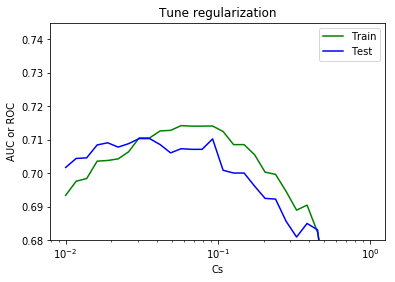

          C     Train      Test
7  0.030392  0.710522  0.710315
8  0.035622  0.710522  0.710315
           C     Train      Test
0   0.010000  0.693363  0.701690
1   0.011721  0.697566  0.704378
2   0.013738  0.698364  0.704559
3   0.016103  0.703574  0.708414
4   0.018874  0.703768  0.709061
5   0.022122  0.704251  0.707773
6   0.025929  0.706371  0.708798
7   0.030392  0.710522  0.710315
8   0.035622  0.710522  0.710315
9   0.041753  0.712610  0.708522
10  0.048939  0.712772  0.706042
11  0.057362  0.714191  0.707292
12  0.067234  0.714037  0.707101
13  0.078805  0.714037  0.707101
14  0.092367  0.714076  0.710226
15  0.108264  0.712437  0.700841
16  0.126896  0.708513  0.700023
17  0.148735  0.708513  0.700023
18  0.174333  0.705495  0.696105
19  0.204336  0.700285  0.692444
20  0.239503  0.699614  0.692226
21  0.280722  0.694556  0.685616
22  0.329034  0.688926  0.680889
23  0.385662  0.690422  0.684944
24  0.452035  0.682314  0.683033
25  0.529832  0.665505  0.656349
26  0.621017 

In [37]:
# variable selection by using lasso regression
drop_list = []
N = 15 #number of variables
Test_roc = [] #create a empty list for storing Test ROC
Train_roc = [] #create a empty list for storing Train ROC
Cs = np.logspace(-2, 0, num=30) #(select 20 numbers between 10^-2 and 10^4 )
# for each C pick the N most important variables and use these vairbles to rerun logistic regression. finally, calculate ROC for train and test.
for C in Cs:
    lr = LogisticRegression(penalty='l1',C = C, solver='saga',random_state = 1).fit(Converted_X_train.drop(drop_list,axis = 1), y_train,y_train_freq)
    feature_importances = pd.DataFrame(lr.coef_.T,
                                       index = Converted_X_train.drop(drop_list,axis = 1).columns,
                                        columns=['importance']).sort_values('importance',ascending=False)
    new_X_train=Converted_X_train[feature_importances.iloc[0:N,:].index.tolist()] #select the best N variables and create a new train dataset
    new_X_test=Converted_X_test[feature_importances.iloc[0:N,:].index.tolist()] #select the best N variables and create a new test dataset
    lr = LogisticRegression().fit(new_X_train, y_train,y_train_freq) #run logistic regression
    y_decision_fn_scores_auc = lr.decision_function(new_X_train) # calculate score (just like when we calculate Taprezoid ROC we need socre)
    Train_roc.append(roc_auc_score(y_train, y_decision_fn_scores_auc, sample_weight = y_train_freq)) #calculate ROC and print it out
    y_decision_fn_scores_auc = lr.decision_function(new_X_test)
    Test_roc.append(roc_auc_score(y_test, y_decision_fn_scores_auc, sample_weight = y_test_freq))

# plot train and test ROC (X: Cs the regulation varible, Y: ROC)
ax = plt.gca()
ax.set_xscale('log')
ax.plot(Cs, Train_roc,'g', label = 'Train')
ax.plot(Cs, Test_roc,'b', label = 'Test')
#Set limits and titles
plt.ylim([0.68,0.745]) # Y range
plt.xlabel('Cs')
plt.ylabel('AUC or ROC')
plt.legend()
plt.title('Tune regularization')
 
plt.savefig('Tuning.png')
plt.show()

df = pd.DataFrame([Cs,Train_roc,Test_roc]).T.rename(columns={0:"C",1:"Train", 2:"Test"}) # save result in dataframe
print(df[df["Test"] == df["Test"].max()]) #print out the C with highest Test ROC
print(df) #print out all C, Train ROC score and Test ROC score

In [38]:
# run logistic regression and print aout ROC and variables we use
lr = LogisticRegression(penalty='l1',C =  0.035622, solver='saga',random_state = 1).fit(Converted_X_train.drop(drop_list,axis = 1), y_train,y_train_freq) #run lasso logistic regression using best C
feature_importances = pd.DataFrame(lr.coef_.T,
                                       index = Converted_X_train.drop(drop_list,axis = 1).columns,
                                        columns=['importance']).sort_values('importance',ascending=False) # create a datafrme to save feature importance
new_X_train=Converted_X_train[feature_importances.iloc[0:N,:].index.tolist()] #select the best N variables and create a new train dataset
new_X_test=Converted_X_test[feature_importances.iloc[0:N,:].index.tolist()] #select the best N variables and create a new test dataset
lr = LogisticRegression().fit(new_X_train, y_train,y_train_freq) #run the logistic
y_decision_fn_scores_auc = lr.decision_function(new_X_train) # calculate decision score (when we calculate Taprezoid ROC we need socre) 
print('Train set AUC: ',roc_auc_score(y_train, y_decision_fn_scores_auc, sample_weight = y_train_freq)) #calculate ROC and print it out
y_decision_fn_scores_auc = lr.decision_function(new_X_test)
print('Test set AUC: ',roc_auc_score(y_test, y_decision_fn_scores_auc, sample_weight = y_test_freq))
selected_feature = feature_importances.iloc[0:N,:].index.tolist() # select the best N variable's name and  and save them in list 
lr_coef = pd.DataFrame(lr.coef_.T, index = new_X_train.columns, columns=['coefficient']).sort_values('coefficient',ascending=False) # create a new dataframe to save variable name and coefficient
print(lr_coef) #print variable coefficient
lr.intercept_[0] #print out intercept

Train set AUC:  0.7105217028822209
Test set AUC:  0.7103153739217227
                         coefficient
ALL2428                     0.627239
ALL4520                     0.579323
LL_SF_NO_LOANS_PAST_DUE     0.567856
addrprevioustimeoldest      0.545787
crossindustry_score         0.531904
AUT7110                     0.481859
cc2_ad                      0.387189
ALL5042                     0.382797
REV0317                     0.372475
COL5060                     0.361185
REH0300                     0.354955
ALL5072                     0.246193
FICCLAV8_SCORE              0.240301
CLEAR_EARLY_RISK_SCORE      0.202635
ALL7115                     0.180663


C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.3490949092763567

In [39]:
# calculate score
scorecard_point ={}
for i in lr_coef.index.tolist():
    scorecard_point[i] = group_dictionary[i].copy()
    scorecard_point[i]['score_point'] =  round((scorecard_point[i]['WOE']*lr_coef.loc[i][0]+lr.intercept_[0]/N)*28.8539008+200/N)
scorecard_point['crossindustry_score']

,min_crossindustry_score,max_crossindustry_score,GOOD,total,GOOD_rate,WOE,score_point
0,501.0,553.0,117.364478,326.364478,0.359612,-0.917154,-0.0
1,554.0,581.0,311.086567,655.086567,0.474879,-0.442383,7.0
2,582.0,633.0,1216.065672,2207.065672,0.550988,-0.137398,12.0
3,634.0,683.0,1406.959701,2239.959701,0.628118,0.181942,17.0
4,684.0,825.0,677.320299,947.320299,0.714986,0.576644,23.0
5,NaN,NaN,52.319104,91.319104,0.572926,-0.051394,13.0


In [40]:
# create scorecard table
for i,j in zip(lr_coef.index.tolist(),range(len(lr_coef))):
    if j == 0:
        scorecard = scorecard_point[i].copy()
        scorecard = scorecard.rename(columns={'min_' + i:'min','max_'+ i:'max'})
        scorecard['variable'] = i
        scorecard = scorecard.set_index('variable')
        
    else:
        scorecard2 = scorecard_point[i].copy()
        scorecard2 = scorecard2.rename(columns={'min_' + i:'min','max_'+ i:'max'})
        scorecard2['variable'] = i
        scorecard2 = scorecard2.set_index('variable')
        scorecard = pd.concat([scorecard,scorecard2], ignore_index=False)
scorecard_before = scorecard.copy()

In [41]:
# import rejected dataset
rejected_db = pd.read_csv(r"\\neptune\RAD\4 Models\Scorecard 8.0\Preliminary\Clarity_and_FT\ValidFICO_Clarity_Hit_CA\Rejects_43742.csv")
len(rejected_db)

43742

In [42]:
# sample rejected dataset down
rejected_sampledown = rejected_db.sample(n=len(GB),random_state=1000)
print("Sample to :",len(rejected_sampledown))

Sample to : 6700


In [43]:
# prepare data for reject inference
#a.remove('Frequency')
#a.remove('G_B')
for i in ['Frequency','TARGET_GB']:
    a.remove(i)
rejected_droped = rejected_sampledown.drop(a,axis=1)

In [44]:
rejected_droped['useless_column'] = 1

In [45]:
# prepare data for reject inference
GB_accept = GB_for_group.copy()
GB_accept['GOOD'] = y['GOOD']
GB_accept['Frequency'] = GB['Frequency']
GB_accept.head(100)

,YRSATWORK,crossindustry_score,inputprovidedssn,inputprovidedphone,subjectrecordtimeoldest,subjectrecordtimenewest,subjectnewestrecord12month,subjectactivityindex03month,subjectactivityindex06month,subjectactivityindex12month,...,SL_DIFF_PAYROLLTYPE_24M,SL_DIFF_PAYROLLTYPE_2M,SL_DIFF_PAYROLLTYPE_3M,SL_DIFF_PAYROLLTYPE_6M,SL_DIFF_PAYROLLTYPE_9M,SL_DIFF_PAYROLLTYPE_EVER,cc2_ad,pd2_ad,GOOD,Frequency
1159,12,633.0,3.0,1.0,380.0,1.0,1.0,4.0,4.0,4.0,...,2.0,2.0,2.0,2.0,2.0,2.0,620.0,664.0,1,1.41403
3737,3,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.41403
7886,2,603.0,3.0,0.0,298.0,1.0,1.0,4.0,4.0,4.0,...,1.0,0.0,0.0,0.0,0.0,1.0,785.0,849.0,1,1.41403
2319,2,656.0,3.0,0.0,118.0,1.0,1.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,719.0,747.0,1,1.41403
7398,2,648.0,3.0,0.0,66.0,1.0,1.0,4.0,4.0,4.0,...,1.0,1.0,1.0,1.0,1.0,2.0,697.0,740.0,1,1.41403
7537,4,613.0,3.0,1.0,253.0,1.0,1.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,789.0,802.0,1,1.41403
538,0,609.0,3.0,0.0,147.0,1.0,1.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.41403
3229,5,625.0,3.0,0.0,70.0,1.0,1.0,4.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.41403
604,0,664.0,3.0,0.0,137.0,1.0,1.0,5.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,719.0,747.0,1,1.41403
4685,0,728.0,3.0,0.0,219.0,1.0,1.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,2.0,729.0,736.0,1,1.41403


In [46]:
# createreject_inference_function

def reject_inference(GB_accept, rejected_droped, model,selected_feature,group_dictionary,rejection_rate =0.7):
    # Convert data
    r_db, converted_r_db = convert_X(rejected_droped, selected_feature, group_dictionary)
    
    Assume_Good = rejected_droped.copy()
    Assume_Good['Good_prob'] = rejection_rate/(1 - rejection_rate)/(len(rejected_droped)/GB_accept['Frequency'].sum())
    Assume_Good['GOOD'] = 1 
    Assume_Good['Frequency'] = Assume_Good['Good_prob']*model.predict_proba(converted_r_db)[:,1]
    
    Assume_Bad = rejected_droped.copy()
    Assume_Bad['Good_prob'] = rejection_rate/(1 - rejection_rate)/(len(rejected_droped)/GB_accept['Frequency'].sum())
    Assume_Bad['GOOD'] = 0
    Assume_Bad['Frequency'] = Assume_Good['Good_prob']*model.predict_proba(converted_r_db)[:,0]
    
    Assume_GB = Assume_Good.append(Assume_Bad, ignore_index=True)
    
    Accept_Reject = GB_accept.reset_index().append(Assume_GB[GB_accept.columns.tolist()], ignore_index=True,sort=False)
    return Accept_Reject

In [47]:
# run reject inference function
Accept_Reject= reject_inference(GB_accept, rejected_droped, lr,selected_feature, group_dictionary, rejection_rate =0.7)
print('Accept_Reject:', len(Accept_Reject))

Accept_Reject: 20100


In [48]:
# prepare data for training
y_Good2=Accept_Reject["GOOD"]
Accept_Reject_index = Accept_Reject['index']
Accept_Reject_freq = Accept_Reject['Frequency']
Accept_Reject_noindex = Accept_Reject.drop(['index','GOOD'],axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(Accept_Reject_noindex, y_Good2, random_state = 1234567, test_size=0.3)
y_train_freq2 = X_train2['Frequency']
y_test_freq2 = X_test2['Frequency']
X_train2 = X_train2.drop(['Frequency'],axis = 1)
X_test2 = X_test2.drop(['Frequency'],axis = 1)

In [49]:
# run interactive grouping again
group_dictionary2, Accept_List2, IV_table2 = interactive_grouping2(X_train2, y_train2, Accept_Reject_freq, n=5, reject_level=0.02)

C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: Run

EL_EmployerDomainMatches includes Nan only
EL_EmployerMatchPercentage includes Nan only
EL_EmployerMatchRatio includes Nan only
EL_EmployerNames includes Nan only
EL_HomeZipToWorkZipDistances includes Nan only
EL_IPaddrOriginDomains includes Nan only
EL_IPOriginToWorkZipDistances includes Nan only
EL_MonthlyIncomes includes Nan only
EL_PaydtMatchCount includes Nan only
EL_PaydtMatchPercentage includes Nan only
EL_paydtmatchProjected includes Nan only
EL_PaydtMatchRatio includes Nan only
EL_PayFrequencies includes Nan only
EL_PayFrequencyMatchPercentage includes Nan only
EL_PayFrequencyMatchRatio includes Nan only
EL_PayrollTypes includes Nan only
EL_Projectedpaydt includes Nan only
EL_Score includes Nan only
EL_ScorePercentage includes Nan only
EL_WorkZips includes Nan only


In [50]:
group_dictionary2['crossindustry_score']

,min_crossindustry_score,max_crossindustry_score,GOOD,total,GOOD_rate,WOE
0,501.0,553.0,621.561265,1858.761471,0.334395,-0.871222
1,554.0,612.0,3157.454962,6549.021466,0.482126,-0.254764
2,613.0,637.0,1580.555802,2820.873458,0.560307,0.059072
3,638.0,678.0,2870.692468,4641.700106,0.618457,0.299647
4,679.0,837.0,1904.121939,2722.446112,0.699416,0.660920
5,NaN,NaN,149.342887,252.749805,0.590872,0.182842


In [51]:
# show information value table
IV_table2

,Variable_Name,Information_Value,Reject_or_Accept
159,FICCLAV8_SCORE,0.299302,Accept
1805,CLEAR_EARLY_RISK_SCORE,0.295205,Accept
470,ALL7350,0.244307,Accept
459,ALL7331,0.244293,Accept
466,ALL7340,0.241743,Accept
472,ALL7360,0.240282,Accept
487,ALL7937,0.221199,Accept
488,ALL7938,0.221029,Accept
473,ALL7370,0.220444,Accept
486,ALL7936,0.213672,Accept


In [52]:
# convert test value to WOE
Original_X_train2, Converted_X_train2 = convert_X(X_train2, Accept_List2, group_dictionary2)
Original_X_test2, Converted_X_test2 = convert_X(X_test2, Accept_List2, group_dictionary2)

C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\lo

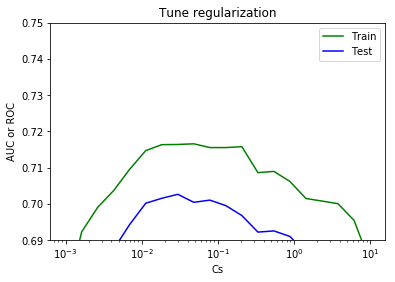

          C     Train      Test
7  0.029764  0.716359  0.702614
            C     Train      Test
0    0.001000  0.674187  0.671924
1    0.001624  0.692255  0.681182
2    0.002637  0.699026  0.684221
3    0.004281  0.703660  0.687477
4    0.006952  0.709545  0.694308
5    0.011288  0.714672  0.700149
6    0.018330  0.716307  0.701504
7    0.029764  0.716359  0.702614
8    0.048329  0.716543  0.700400
9    0.078476  0.715506  0.701008
10   0.127427  0.715506  0.699482
11   0.206914  0.715747  0.696745
12   0.335982  0.708590  0.692179
13   0.545559  0.708926  0.692505
14   0.885867  0.706146  0.690979
15   1.438450  0.701450  0.686353
16   2.335721  0.700746  0.684245
17   3.792690  0.700014  0.683945
18   6.158482  0.695440  0.674324
19  10.000000  0.683879  0.665539


In [53]:
# variable selection
drop_list = []
N2 = 15 # number of variables
Test_roc = []
Train_roc = []
Cs = np.logspace(-3, 1, num=20)
for C in Cs:
    lr2 = LogisticRegression(penalty='l1', solver='saga',C = C).fit(Converted_X_train2.drop(drop_list,axis = 1), y_train2,y_train_freq2)
    feature_importances2 = pd.DataFrame(lr2.coef_.T,
                                       index = Converted_X_train2.drop(drop_list,axis = 1).columns,
                                        columns=['importance']).sort_values('importance',ascending=False)
    new_X_train2=Converted_X_train2[feature_importances2.iloc[0:N2,:].index.tolist()]
    new_X_test2=Converted_X_test2[feature_importances2.iloc[0:N2,:].index.tolist()]
    lr2 = LogisticRegression().fit(new_X_train2, y_train2,y_train_freq2)
    y_decision_fn_scores_auc2 = lr2.decision_function(new_X_train2)
    Train_roc.append(roc_auc_score(y_train2, y_decision_fn_scores_auc2, sample_weight = y_train_freq2))
    y_decision_fn_scores_auc2 = lr2.decision_function(new_X_test2)
    Test_roc.append(roc_auc_score(y_test2, y_decision_fn_scores_auc2, sample_weight = y_test_freq2))
    
ax = plt.gca()
ax.set_xscale('log')
ax.plot(Cs, Train_roc,'g', label = 'Train')
ax.plot(Cs, Test_roc,'b', label = 'Test')
#Set limits and titles
plt.ylim([0.69,0.75])
plt.xlabel('Cs')
plt.ylabel('AUC or ROC')
plt.legend()
plt.title('Tune regularization')
 
plt.savefig('Tuning.png')
plt.show()

df2 = pd.DataFrame([Cs,Train_roc,Test_roc]).T.rename(columns={0:"C",1:"Train", 2:"Test"})
print(df2[df2["Test"] == df2["Test"].max()])
print(df2)

In [54]:
# run logistic regression
lr2 = LogisticRegression(penalty='l1', solver='saga',C = 0.029764).fit(Converted_X_train2.drop(drop_list,axis = 1), y_train2,y_train_freq2)
feature_importances2 = pd.DataFrame(lr2.coef_.T,
                                       index = Converted_X_train2.drop(drop_list,axis = 1).columns,
                                        columns=['importance']).sort_values('importance',ascending=False)
new_X_train2=Converted_X_train2[feature_importances2.iloc[0:N2,:].index.tolist()]
new_X_test2=Converted_X_test2[feature_importances2.iloc[0:N2,:].index.tolist()]
lr2 = LogisticRegression().fit(new_X_train2, y_train2,y_train_freq2)
y_decision_fn_scores_auc2 = lr2.decision_function(new_X_train2)
print('Train set AUC: ',roc_auc_score(y_train2, y_decision_fn_scores_auc2, sample_weight = y_train_freq2))
y_decision_fn_scores_auc2 = lr2.decision_function(new_X_test2)
print('Test set AUC: ',roc_auc_score(y_test2, y_decision_fn_scores_auc2, sample_weight = y_test_freq2))
lr_coef2 = pd.DataFrame(lr2.coef_.T, index = new_X_train2.columns, columns=['coefficient']).sort_values('coefficient',ascending=False)
print(lr_coef2)
lr2.intercept_[0]

Train set AUC:  0.7163589656612357
Test set AUC:  0.7026135330411674
                         coefficient
ALL2428                     0.572028
AUT7110                     0.553190
ALL4520                     0.502933
crossindustry_score         0.495140
addrprevioustimeoldest      0.493478
ALL5042                     0.387930
REV0317                     0.344932
cc2_ad                      0.335703
REV0300                     0.330767
LL_SF_TTL_OS_BALANCE        0.312391
COL3210                     0.284062
ALM5074                     0.239200
FICCLAV8_SCORE              0.222867
CLEAR_EARLY_RISK_SCORE      0.204831
LL_SF_NO_LOANS_PAST_DUE     0.176989


C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.19096115376229508

In [55]:
# calculate score
scorecard_point ={}
for i in lr_coef2.index.tolist():
    scorecard_point[i] = group_dictionary2[i].copy()
    scorecard_point[i]['score_point'] =  round((scorecard_point[i]['WOE']*lr_coef2.loc[i][0]+lr2.intercept_[0]/N2)*28.8539008+200/N2)
scorecard_point['cc2_ad']

,min_cc2_ad,max_cc2_ad,GOOD,total,GOOD_rate,WOE,score_point
0,536.0,669.0,927.548713,2392.801121,0.387641,-0.640290,7.0
1,670.0,687.0,748.915857,1659.854431,0.451194,-0.378980,10.0
2,688.0,712.0,1687.889761,3284.923015,0.513829,-0.127935,12.0
3,713.0,823.0,4933.555371,8510.607487,0.579695,0.138233,15.0
4,NaN,NaN,1985.819622,2997.366363,0.662521,0.491059,18.0


In [56]:
# score function
# the same as Convert_X function
def score(db_original, Feature_List, scorecard_point):
    db = db_original[Feature_List]
    db1 = db.fillna(db.min()-200000).reset_index()
    columns = db.columns
    converted_db = db.copy()
    scorecard_point1 = copy.deepcopy(scorecard_point)
    for i in range(len(columns)):
                db1[columns[i]] = db1[columns[i]].astype('float64')
                scorecard_point1[columns[i]].loc[0,['min_' + columns[i]]] = scorecard_point[columns[i]]['min_' + columns[i]].min()-100000
                db2 = pd.merge_asof(db1.sort_values(columns[i]), \
                                    scorecard_point1[columns[i]].fillna(scorecard_point1[columns[i]].min()-300000).sort_values('min_' + columns[i]), \
                                    left_on = columns[i], right_on = 'min_' + columns[i])[['index','score_point']].set_index('index')
                converted_db[columns[i]] = db2['score_point']
                converted_db['sum'] = converted_db[Feature_List].sum(axis = 1)
    return converted_db

In [57]:
# run the score function to calculate score
scored_db = score(db,lr_coef2.index.tolist(),scorecard_point)

In [58]:
scored_db

,ALL2428,AUT7110,ALL4520,crossindustry_score,addrprevioustimeoldest,ALL5042,REV0317,cc2_ad,REV0300,LL_SF_TTL_OS_BALANCE,COL3210,ALM5074,FICCLAV8_SCORE,CLEAR_EARLY_RISK_SCORE,LL_SF_NO_LOANS_PAST_DUE,sum
0,18.0,12.0,5.0,10.0,15.0,18.0,13.0,12.0,12.0,14.0,12.0,13.0,13.0,17.0,13.0,197.0
1,18.0,19.0,13.0,1.0,11.0,13.0,10.0,12.0,10.0,14.0,12.0,13.0,17.0,17.0,13.0,193.0
2,9.0,12.0,20.0,10.0,15.0,13.0,13.0,18.0,15.0,14.0,18.0,13.0,13.0,17.0,15.0,215.0
3,18.0,12.0,13.0,15.0,8.0,18.0,18.0,15.0,15.0,14.0,18.0,20.0,22.0,21.0,15.0,242.0
4,9.0,12.0,5.0,10.0,17.0,10.0,12.0,7.0,12.0,14.0,11.0,12.0,9.0,13.0,13.0,166.0
5,9.0,12.0,13.0,18.0,15.0,10.0,18.0,7.0,18.0,14.0,12.0,12.0,9.0,11.0,13.0,191.0
6,18.0,16.0,13.0,18.0,8.0,10.0,16.0,7.0,15.0,14.0,11.0,12.0,11.0,13.0,13.0,195.0
7,18.0,16.0,13.0,18.0,11.0,18.0,16.0,12.0,15.0,14.0,18.0,20.0,17.0,17.0,13.0,236.0
8,18.0,12.0,13.0,15.0,11.0,10.0,10.0,18.0,10.0,14.0,12.0,13.0,11.0,11.0,15.0,193.0
9,18.0,19.0,24.0,23.0,8.0,10.0,22.0,12.0,18.0,14.0,12.0,13.0,11.0,13.0,13.0,230.0


In [59]:
# add a new column 'score' to original dataset
db['score'] = scored_db['sum']

In [60]:
# create scorecard table
for i,j in zip(lr_coef2.index.tolist(),range(len(lr_coef2))):
    if j == 0:
        scorecard = scorecard_point[i].copy()
        scorecard = scorecard.rename(columns={'min_' + i:'min','max_'+ i:'max'})
        scorecard['variable'] = i
        scorecard = scorecard.set_index('variable')
        
    else:
        scorecard2 = scorecard_point[i].copy()
        scorecard2 = scorecard2.rename(columns={'min_' + i:'min','max_'+ i:'max'})
        scorecard2['variable'] = i
        scorecard2 = scorecard2.set_index('variable')
        scorecard = pd.concat([scorecard,scorecard2], ignore_index=False)
scorecard

,min,max,GOOD,total,GOOD_rate,WOE,score_point
variable,,,,,,,
ALL2428,0.0,0.0,6401.097845,10617.593413,0.602877,0.234175,18.0
ALL2428,1.0,18.0,3875.029143,8206.737764,0.472177,-0.294645,9.0
ALL2428,NaN,NaN,7.602336,21.221240,0.358242,-0.738612,2.0
AUT7110,0.0,99.0,2193.877193,3530.147062,0.621469,0.312392,19.0
AUT7110,100.0,103.0,1321.632514,2259.519399,0.584918,0.159589,16.0
AUT7110,104.0,726.0,337.347978,840.937346,0.401157,-0.583407,4.0
AUT7110,NaN,NaN,6430.871639,12214.948611,0.526476,-0.077257,12.0
ALL4520,0.0,3.0,1250.764526,3166.641435,0.394981,-0.609532,5.0
ALL4520,4.0,24.0,4767.310947,9070.426262,0.525588,-0.080818,13.0


In [61]:
#Stage 2
#Filter out Good and Bad

Stage2_Goods=db[db["TARGET_GB"]=="GOOD"]  #we use two db because one db will give the count of the whole dataset
Stage2_Bads=db[db["TARGET_GB"]=="BAD"]
Stage2_GB=Stage2_Goods.append(Stage2_Bads) #can do Good.append(Bad)
print("append Good and Bad:",len(Stage2_GB)) #GB #will give the dataset that has the good and bad appended

append Good and Bad: 7320


In [62]:
# Convert Good and Bad to dummy variable
Stage2_GB_y = pd.get_dummies(Stage2_GB["TARGET_GB"]) #converts categorical variable (target) into dummy/indicator variables such as zero and one. The G_B becomes two columns (Good and Bad)
Stage2_GB_y_Bad = Stage2_GB_y["BAD"]

In [63]:
# Train and Test split
Stage2_X_train, Stage2_X_test, Stage2_y_train, Stage2_y_test = train_test_split(Stage2_GB[['score','SQL_CASHDOWNPCT', 'SQL_PTI', 'SQL_OPENINGBALANCE_PCT']], Stage2_GB_y_Bad, random_state = 34, test_size=0.25) #2609

In [64]:
# Run logistic Regression
lr3 = LogisticRegression().fit(Stage2_X_train, Stage2_y_train)

C:\Users\tag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
y_decision_fn_scores_auc3 = lr3.decision_function(Stage2_X_train)
print('Train set AUC: ',roc_auc_score(Stage2_y_train, y_decision_fn_scores_auc3))
y_decision_fn_scores_auc3 = lr3.decision_function(Stage2_X_test)
print('Test set AUC: ',roc_auc_score(Stage2_y_test, y_decision_fn_scores_auc3))
lr_coef3 = pd.DataFrame(lr3.coef_.T, index = Stage2_X_train.columns, columns=['coefficient']).sort_values('coefficient',ascending=False)
print(lr_coef3)
lr3.intercept_[0]

Train set AUC:  0.7103381551786684
Test set AUC:  0.7217893786265994
                        coefficient
SQL_PTI                    0.026581
SQL_OPENINGBALANCE_PCT     0.007528
SQL_CASHDOWNPCT           -0.007688
score                     -0.032605


5.236457242393316

In [ ]:
# calculate Bad Proba
db['Bad_Proba'] = lr3.predict_proba(db[['score','SQL_CASHDOWNPCT', 'SQL_PTI', 'SQL_OPENINGBALANCE_PCT']])[:,1]

In [ ]:
abc = IV_table2.set_index('Variable_Name').loc[new_X_train2.columns.tolist(),:].sort_values('Information_Value', ascending=False)
abc

In [ ]:
# export result to excel
writer = pd.ExcelWriter(r'\\neptune\RAD\4 Models\Scorecard 8.0\Temp\JM\FT_Clarity\Clarity hit vs FT hit\CA\Clarity\8.0 Valid FICO C_Hit CA(Clarity, FT, no spectrum).xlsx')
db.to_excel(writer,'Sheet1')
scorecard.to_excel(writer,'Variables_after')
scorecard_before.to_excel(writer,'Variables_before')
abc.to_excel(writer,'Information_Values')
writer.save()